<img src="https://www.inf.utfsm.cl/images/slides/Departamento-de-Informtica_HORIZONTAL.png" title="Title text" width="80%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2021 </h1>

<H3 align='center'> Tarea 2 - Redes Neuronales y Deep Learning </H3>
<hr style="height:2px;border:none"/>

## **Temas**  

* Arquitecturas de Redes Convolucionales. 
* Entrenamiento de Redes Convolucionales.
* Regularización.
* Tasas adaptivas, Batchnormalization.
* Problemas Especiales.

## **Formalidades**  

* Equipos de trabajo de 3 personas ya inscritos para la tarea anterior (de existir algún cambio, por favor avisar a la brevedad).
* Formato de entrega: envı́o de Jupyter notebook y link de video Youtube o plataforma a convenir, todo esto vía Aula. 
* Cada persona debe estar en condiciones de realizar una presentación del trabajo realizado por su equipo y responder preguntas sobre el mismo. El día de la defensa oral serán seleccionados 4-5 presentadores aleatoriamente de entre la clase.
* La tarea tiene 2 partes: una pregunta de investigación donde se evalúa la metodología adoptada y un competencia donde pesa más el resultado y el ranking obtenido. 
* Fecha de Entrega de Código: 9 de Julio de 2021 23:59:00 Hrs.
* Fecha de Defensa Oral: 9 de Julio  de 2021 en horario de clases.
* Fecha de Entrega de Video: 9 de Julio  de 2021 23:59:00 Hrs.

<hr style="height:2px;border:none"/>

### **Propuesta**
* Se debe preparar una presentación de **15 a 20 minutos** donde se explique el cómo se va a realizar/resolver el taller, la metodología o propuesta de las componentes a experimentar y explorar. Más detalles en el Syllabus.
* Fecha de encuentro Zoom: 2 de Julio en horario de clases.
* Fecha de entrega de vídeo: Opcional para quienes presentaron y obligatorio para quienes no, a lo más 2 días después del encuentro.
* Modalidad de Presentación (Zoom): En el primer bloque, se formarán 3 grupos para que alcancen a recibir feedback todos los equipos. En el segundo bloque, algunos equipos seleccionados presentarán a todo el curso. 

**Aún si la idea es aprender colaborativamente, valoraremos mucho la diversidad de ideas, por lo que las propuesta debiesen conservar su orientación inicial, excepto por el feedback que les entreguemos**

### **Defensa**
* Se debe preparar una presentación de **15 a 20 minutos** con los resultados obtenidos y conclusiones de la experiencia. 
* Se debe entregar el código, de preferencia en un (breve) Jupyter/IPython notebook, de modo que **permita reproducir los resultados** presentados. Si se entrega el código fuente se deben proveer instrucciones para su uso.
* Fecha de encuentro Zoom: 26 de Junio, horario de clases.
* Fecha de entrega de vídeo: 2 días antes de encuentro.
* Fecha de entrega de Jypter (notebook): commits hasta 2 días antes del encuentro. 
* Modalidad de Presentación (Zoom): En ambos bloques algunos equipos seleccionados presentarán ante todo el curso, discusión y debate se generará en base a los resultados.

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Pregunta Libre   
[2.](#segundo) Challenge Kaggle


Incluir en el archivo Jupyter/IPython notebook una breve declaración que
describe la contribución de cada uno de los autores indicando que se trata de un trabajo
original, realizado en conformidad con el código de honor de la universidad.
(Las citaciones textuales así como el re-uso de código están permitidos siempre y cuando se atribuyan los créditos al autor/fuente.)


# Taller 2 Sansanos Overfitted


*   Felipe Cisternas, 201873022-K
*   Lucas Galindo,    201873004-1



# Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import PIL #libreria de manejo de imagenes
import os #listdirs
from sklearn.model_selection import train_test_split
from keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.callbacks import History,EarlyStopping
from keras.models import Model
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import tensorflow_datasets as tfds

# Pregunta Libre


> **21. Entrenamiento de CNNs**: Usar regularización L2 mejora el entrenamiento de la red Convolucional.







###Primer Dataset: MNIST

In [ ]:
# Model / data parameters
num_classes_mnist = 10

# the data, split between train and test sets
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train_mnist = x_train_mnist.astype("float32") / 255
x_test_mnist = x_test_mnist.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train_mnist = np.expand_dims(x_train_mnist, -1)
x_test_mnist = np.expand_dims(x_test_mnist, -1)
print("x_train_mnist shape:", x_train_mnist.shape)
print(x_train_mnist.shape[0], "train samples")
print(x_test_mnist.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train_mnist = keras.utils.to_categorical(y_train_mnist, num_classes_mnist)
y_test_mnist = keras.utils.to_categorical(y_test_mnist, num_classes_mnist)

11493376/11490434 [==============================] - 0s 0us/step
x_train_mnist shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


###Segundo Dataset: CIFAR10

In [ ]:
(x_train_cifar,y_train_cifar), (x_test_cifar,y_test_cifar) = keras.datasets.cifar10.load_data()

num_classes_cifar = len(np.unique(y_train_cifar))

# Scale images to the [0, 1] range
x_train_cifar = x_train_cifar.astype("float32") / 255
x_test_cifar = x_test_cifar.astype("float32") / 255

print("x_train shape:", x_train_cifar.shape)
print(x_train_cifar.shape[0], "train samples")
print(x_test_cifar.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train_cifar = keras.utils.to_categorical(y_train_cifar, num_classes_cifar)
y_test_cifar = keras.utils.to_categorical(y_test_cifar, num_classes_cifar)

print(y_train_cifar.shape)
print(y_test_cifar.shape)

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(50000, 10)
(10000, 10)


###Tercer Dataset: FASHION MNIST

In [ ]:
(x_train_fm,y_train_fm), (x_test_fm,y_test_fm) = keras.datasets.fashion_mnist.load_data()

num_classes_fm = len(np.unique(y_train_fm))

# Scale images to the [0, 1] range
x_train_fm = x_train_fm.astype("float32") / 255
x_test_fm = x_test_fm.astype("float32") / 255

x_train_fm = np.expand_dims(x_train_fm, -1)
x_test_fm = np.expand_dims(x_test_fm, -1)
print("x_train shape:", x_train_fm.shape)
print(x_train_fm.shape[0], "train samples")
print(x_test_fm.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train_fm = keras.utils.to_categorical(y_train_fm, num_classes_fm)
y_test_fm = keras.utils.to_categorical(y_test_fm, num_classes_fm)

print(y_train_fm.shape)
print(y_test_fm.shape)


4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(60000, 10)
(10000, 10)


###Seleccion Dataset

In [ ]:
# 0 for MNIST, 1 for CIFAR10, 2 for FASHION MNIST
selec = 2

if selec == 0:
  print('loaded MNIST DATASET')
  inputs = layers.Input(shape=(28,28,1))
  results = y_train.shape[1]
  x_train = x_train_mnist
  x_test = x_test_mnist
  y_train = y_train_mnist
  y_test = y_test_mnist 
  batch=512
if selec == 1:
  print('loaded CIFA10 DATASET')
  inputs = layers.Input(shape=(32,32,3))
  results = y_train_cifar.shape[1]
  x_train = x_train_cifar
  x_test = x_test_cifar
  y_train = y_train_cifar
  y_test = y_test_cifar
  batch = 256
if selec == 2:
  print('loaded FASHION MNIST DATASET')
  inputs = layers.Input(shape=(28,28,1))
  results = y_train_fm.shape[1]
  x_train = x_train_fm
  x_test = x_test_fm
  y_train = y_train_fm
  y_test = y_test_fm
  batch =512

loaded FASHION MNIST DATASET


###CNN Model sin Regularizacion

Model: "Overfitted"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

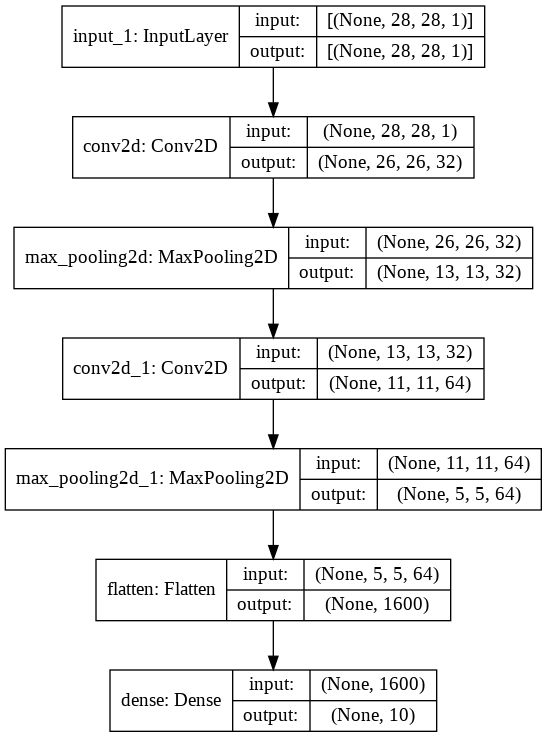

In [ ]:
xi = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(inputs)
xi = layers.MaxPooling2D()(xi)
xi = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(xi)
xi = layers.MaxPooling2D()(xi)
xi = layers.Flatten()(xi)

out = layers.Dense(results, activation='softmax')(xi)

model = Model(inputs=inputs, outputs=out, name='Overfitted')
model.summary()
keras.utils.plot_model(model, show_shapes=True)

Epoch 1/500
94/94 - 44s - loss: 0.9507 - acc: 0.6827 - val_loss: 0.5668 - val_acc: 0.7950
Epoch 2/500
94/94 - 1s - loss: 0.5163 - acc: 0.8115 - val_loss: 0.4828 - val_acc: 0.8278
Epoch 3/500
94/94 - 1s - loss: 0.4449 - acc: 0.8429 - val_loss: 0.4278 - val_acc: 0.8509
Epoch 4/500
94/94 - 1s - loss: 0.4022 - acc: 0.8589 - val_loss: 0.3937 - val_acc: 0.8610
Epoch 5/500
94/94 - 1s - loss: 0.3785 - acc: 0.8665 - val_loss: 0.3981 - val_acc: 0.8586
Epoch 6/500
94/94 - 1s - loss: 0.3611 - acc: 0.8726 - val_loss: 0.3625 - val_acc: 0.8728
Epoch 7/500
94/94 - 1s - loss: 0.3465 - acc: 0.8768 - val_loss: 0.3508 - val_acc: 0.8779
Epoch 8/500
94/94 - 1s - loss: 0.3325 - acc: 0.8826 - val_loss: 0.3482 - val_acc: 0.8752
Epoch 9/500
94/94 - 1s - loss: 0.3220 - acc: 0.8861 - val_loss: 0.3345 - val_acc: 0.8820
Epoch 10/500
94/94 - 1s - loss: 0.3159 - acc: 0.8879 - val_loss: 0.3348 - val_acc: 0.8831
Epoch 11/500
94/94 - 1s - loss: 0.3073 - acc: 0.8909 - val_loss: 0.3228 - val_acc: 0.8877
Epoch 12/500
94/94

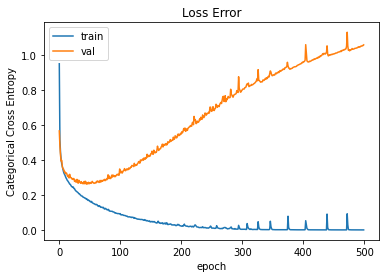

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(x=x_train, y=y_train, batch_size=batch, epochs=500, verbose=2, validation_split=0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Error')
plt.ylabel('Categorical Cross Entropy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

###CNN Model con Regularizacion L2

In [ ]:
xi = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', kernel_regularizer='l2')(inputs)
xi = layers.MaxPooling2D()(xi)
xi = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_regularizer='l2')(xi)
xi = layers.MaxPooling2D()(xi)
xi = layers.Flatten()(xi)

out = layers.Dense(results, activation='softmax')(xi)

model_l2 = Model(inputs=inputs, outputs=out, name='RegularizedL2')
model_l2.summary()
keras.utils.plot_model(model_l2, show_shapes=True)

In [ ]:
model_l2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model_l2.fit(x=x_train, y=y_train, batch_size=batch, epochs=500, verbose=2, validation_split=0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Error')
plt.ylabel('Categorical Cross Entropy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

###Predicciones y Accuracy

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
model_l2.evaluate(x_test, y_test)

# Desafio Kaggle

Esta parte de la tarea consiste en predecir las clases de movimiento de yoga que aparece en una imágen. Cada movimiento de yoga se puede clasificar en dos jerarquías, ver detalle más abajo.

### Dataset

El dataset de entrenamiento incluye 1328 imágenes de poses de yoga descargadas de la web usando el motor de búsqueda de Bing, donde cada imágen de entrenamiento, tiene dos clasificaciones (super clase y sublase, separadas por un espacio). El test set incluye 390 imágenes. La primera (super clase), puede tomar 6 valores: 0-Standing, 1-Sitting, 2-Balanced, 3-Inverted, 4-Reclining, 5-Wheel. La segunda (subclase), puede tomar 20 diferentes valores: 6-straight, 7-forward bend, 8-side bend, 9-other1, 10-normal1, 11-normal2, 12-split, 13-forward bend, 14-twist, 15-front, 16-side, 17-legs1, 18-legs2, 19-up-facing1, 20-down-facing1, 21-side facing, 22-plank balance, 23-up-facing2, 24-down-facing2, 25-other2. 

La competencia Kaggle es:

> https://www.kaggle.com/t/c474575bf6e64e1a963d038324f86eed

Los datos para comenzar a trabajar se encuentran en dicha competencia, y también en:

> http://www.inf.utfsm.cl/~cvalle/Yoga-Dataset.rar


Al descomprimir notarán que existen 2 archivos de texto, con las listas de imágenes de entrenamiento y test.
Cada línea del archivo de entrenamiento contiene el nombre del archivo asociado a la imagen, la super clase, y las clase a la que pertenece (separadas por un espacio).
En la carpeta Images se encuentran todas las imágenes (tanto de entrenamiento como de test)


Pueden también descargar los datos directamente a la máquina donde estén ejecutando el código con los siguientes comandos


In [ ]:
!wget  https://www.inf.utfsm.cl/~cvalle/Yoga-Dataset.rar
!mkdir yoga
!unrar e Yoga-Dataset.rar '/content/yoga/'

--2021-07-06 22:36:00--  https://www.inf.utfsm.cl/~cvalle/Yoga-Dataset.rar
Resolving www.inf.utfsm.cl (www.inf.utfsm.cl)... 200.1.19.11, 2800:270:c::11
Connecting to www.inf.utfsm.cl (www.inf.utfsm.cl)|200.1.19.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244765013 (233M) [application/x-rar-compressed]
Saving to: ‘Yoga-Dataset.rar’

Yoga-Dataset.rar    100%[===================>] 233.43M  11.2MB/s    in 29s     

2021-07-06 22:36:30 (8.01 MB/s) - ‘Yoga-Dataset.rar’ saved [244765013/244765013]


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Yoga-Dataset.rar

Extracting  /content/yoga/0.jpg                                            0%  OK 
Extracting  /content/yoga/1.jpg                                            0%  OK 
Extracting  /content/yoga/10.jpg                                           0%  OK 
Extracting  /content/yoga/100.jpg                                          0%  OK 

In [ ]:
test_file = open('/content/yoga/yoga_test.txt', 'r')
test_data = []
for line in test_file:
  img_name, vals = line.split(',')
  I = PIL.Image.open('/content/yoga/'+img_name).resize((100,100)).convert('RGB')
  test_data.append((np.asarray(I)))
  I.close()
test_file.close()

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
x_test = np.array(test_data).reshape(len(test_data),100,100,3)

In [ ]:
train_file = open('/content/yoga/yoga_train.txt', 'r')
train_data_super = []
train_data_sub = []
for line in train_file:
  img_name, vals = line.split(',')
  sup, sub = vals.split(' ')
  I = PIL.Image.open('/content/yoga/'+img_name).resize((100,100)).convert('RGB')
  train_data_super.append((np.asarray(I), int(sup)))
  train_data_sub.append((np.asarray(I), int(sub)))
  I.close()
train_file.close()

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
df_super_temp = pd.DataFrame(train_data_super,columns=['yoga image','class'])
df_super_temp = df_super_temp.sample(frac = 1,random_state=0)
df_sub_temp = pd.DataFrame(train_data_sub,columns=['yoga image','class'])
df_sub_temp = df_sub_temp.sample(frac = 1,random_state=0)

### Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
def augmentation(n,df,samples=1000):
  aug = df.loc[df['class'] == n]
  aug_list = aug['yoga image'].to_list()
  length = len(aug_list)
  aug = np.array(aug_list).reshape(length,100,100,3)
  
  directory = str(n)
  parent_dir = "/content"
  path = os.path.join(parent_dir, directory)
  os.mkdir(path)

  max_img = round(samples/length)
  
  i = 0
  for batch in train_datagen.flow(aug, save_to_dir=path, save_format='jpeg',batch_size=length):
    i += 1
    if i > max_img:
        break
  
  aug_data = []
  for image in os.listdir(path):
    I = PIL.Image.open(os.path.join(path,image)).convert('RGB')
    aug_data.append((np.asarray(I), int(n)))
    I.close()

  return aug_data

In [ ]:
super_0 = augmentation(0,df_super_temp)
super_1 = augmentation(1,df_super_temp)
super_2 = augmentation(2,df_super_temp)
super_3 = augmentation(3,df_super_temp)
super_4 = augmentation(4,df_super_temp)
super_5 = augmentation(5,df_super_temp)

In [ ]:
super_6 = augmentation(6,df_sub_temp)
super_7 = augmentation(7,df_sub_temp)
super_8 = augmentation(8,df_sub_temp)
super_9 = augmentation(9,df_sub_temp)
super_10 = augmentation(10,df_sub_temp)
super_11 = augmentation(11,df_sub_temp)
super_12 = augmentation(12,df_sub_temp)
super_13 = augmentation(13,df_sub_temp)
super_14 = augmentation(14,df_sub_temp)
super_15 = augmentation(15,df_sub_temp)
super_16 = augmentation(16,df_sub_temp)
super_17 = augmentation(17,df_sub_temp)
super_18 = augmentation(18,df_sub_temp)
super_19 = augmentation(19,df_sub_temp)
super_20 = augmentation(20,df_sub_temp)
super_21 = augmentation(21,df_sub_temp)
super_22 = augmentation(22,df_sub_temp)
super_23 = augmentation(23,df_sub_temp)
super_24 = augmentation(24,df_sub_temp)
super_25 = augmentation(25,df_sub_temp)

In [ ]:
fixed_super = super_0+super_1+super_2+super_3+super_4+super_5

In [ ]:
fixed_sub = super_6+super_7+super_8+super_9+super_10+super_11+super_12+super_13+super_14+super_15+super_16+super_17+super_18+super_19+super_20+super_21+super_22+super_23+super_24+super_25

In [ ]:
df_super2 = pd.DataFrame(fixed_super,columns=['yoga image','class'])
df_super2 = df_super2.sample(frac = 1,random_state=0)

In [ ]:
df_sub2 = pd.DataFrame(fixed_sub,columns=['yoga image','class'])
df_sub2 = df_sub2.sample(frac = 1,random_state=0)

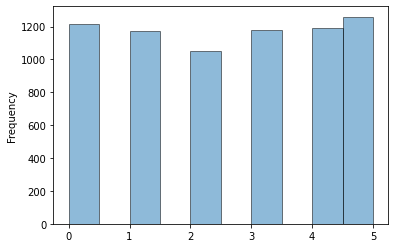

In [ ]:
df_super2['class'].plot.hist(alpha=0.5, histtype='bar', ec='black')

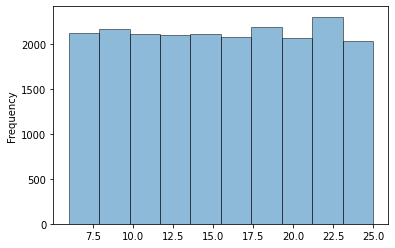

In [ ]:
df_sub2['class'].plot.hist(alpha=0.5, histtype='bar', ec='black')

In [ ]:
X_1 = df_super2['yoga image'].to_list()
X_1 = np.array(X_1).reshape(len(X_1),100,100,3)
Y_1 = pd.get_dummies(df_super2['class'])

X_2 = df_sub2['yoga image'].to_list()
X_2 = np.array(X_2).reshape(len(X_2),100,100,3)
Y_2 = pd.get_dummies(df_sub2['class'])


In [ ]:
x_val_1 = df_super_temp['yoga image'].to_list()
x_val_1 = np.array(x_val_1).reshape(len(x_val_1),100,100,3)
y_val_1 = pd.get_dummies(df_super_temp['class'])

x_val_2 = df_sub_temp['yoga image'].to_list()
x_val_2 = np.array(x_val_2).reshape(len(x_val_2),100,100,3)
y_val_2 = pd.get_dummies(df_sub_temp['class'])

In [ ]:
x_train_1 = X_1
y_train_1 = Y_1

x_train_2 = X_2
y_train_2 = Y_2

In [ ]:
x_train_1, x_val_1, x_train_2, x_val_2, x_test = [k.astype(np.float32)*2/255-1 for k in [x_train_1, x_val_1, x_train_2, x_val_2, x_test]]
(x_test.min(), x_test.max())

(-1.0, 1.0)

In [ ]:
n_classes_1 = y_train_1.shape[1]
n_classes_2 = y_train_2.shape[1]

### Modelos

In [ ]:
from keras.applications.vgg19 import VGG19
model = VGG19(include_top=False,input_shape=(100, 100, 3))
for layer in model.layers:
	layer.trainable = False

flat1 = Flatten()(model.layers[-1].output)
x = Dense(2048, activation='relu')(flat1)
x = Dropout(0.8)(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

output = Dense(n_classes_1,activation='softmax')(x)

model = Model(inputs=model.inputs, outputs=output)

model.summary()
#keras.utils.plot_model(model, show_shapes=True)

80150528/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
______________________________________________________________

In [ ]:
from keras.applications.vgg19 import VGG19
model_2 = VGG19(include_top=False,input_shape=(100, 100, 3))
for layer in model_2.layers:
	layer.trainable = False

flat2 = Flatten()(model_2.layers[-1].output)
y = Dense(2048, activation='relu')(flat2)
y = Dropout(0.8)(y)
y = Dense(1024, activation='relu')(y)
y = Dense(512, activation='relu')(y)
y = Dense(256, activation='relu')(y)
y = Dense(128, activation='relu')(y)


output = Dense(n_classes_2,activation='softmax')(y)

model_2 = Model(inputs=model_2.inputs, outputs=output)

model_2.summary()
#keras.utils.plot_model(model_2, show_shapes=True)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

Ejemplos de entrenamiento: 7067
Epoch 1/200
111/111 - 58s - loss: 1.8102 - acc: 0.2137 - val_loss: 1.6583 - val_acc: 0.2800
Epoch 2/200
111/111 - 9s - loss: 1.5973 - acc: 0.3289 - val_loss: 1.3948 - val_acc: 0.4592
Epoch 3/200
111/111 - 10s - loss: 1.4908 - acc: 0.3947 - val_loss: 1.3246 - val_acc: 0.4744
Epoch 4/200
111/111 - 10s - loss: 1.4072 - acc: 0.4302 - val_loss: 1.2151 - val_acc: 0.5080
Epoch 5/200
111/111 - 11s - loss: 1.3603 - acc: 0.4504 - val_loss: 1.1737 - val_acc: 0.5688
Epoch 6/200
111/111 - 11s - loss: 1.2893 - acc: 0.4930 - val_loss: 1.1262 - val_acc: 0.5680
Epoch 7/200
111/111 - 10s - loss: 1.2417 - acc: 0.5132 - val_loss: 1.0851 - val_acc: 0.5832
Epoch 8/200
111/111 - 10s - loss: 1.2102 - acc: 0.5199 - val_loss: 1.0709 - val_acc: 0.6024
Epoch 9/200
111/111 - 10s - loss: 1.1599 - acc: 0.5448 - val_loss: 0.9824 - val_acc: 0.6632
Epoch 10/200
111/111 - 10s - loss: 1.1197 - acc: 0.5592 - val_loss: 0.9968 - val_acc: 0.6264
Epoch 11/200
111/111 - 10s - loss: 1.0741 - acc:

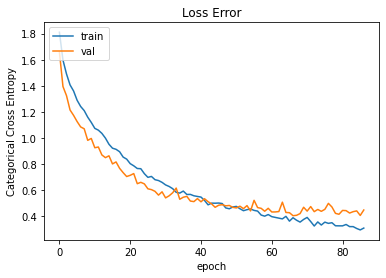

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

_batch_size = 64
          
print("Ejemplos de entrenamiento: {n_t}".format(n_t = x_train_1.shape[0] ) )

history = model.fit(
    x = x_train_1,
    y = y_train_1,
    batch_size = _batch_size,
    epochs=200,
    verbose=2,
    callbacks=[History(), EarlyStopping(patience=20, monitor="val_loss",restore_best_weights=True)] ,
    validation_data=(x_val_1,y_val_1),
    )

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Error')
plt.ylabel('Categorical Cross Entropy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Ejemplos de entrenamiento: 21243
Epoch 1/200
83/83 - 50s - loss: 2.8981 - acc: 0.0981 - val_loss: 2.5342 - val_acc: 0.1792
Epoch 2/200
83/83 - 26s - loss: 2.3754 - acc: 0.2550 - val_loss: 1.9290 - val_acc: 0.3856
Epoch 3/200
83/83 - 27s - loss: 2.0268 - acc: 0.3623 - val_loss: 1.6895 - val_acc: 0.4392
Epoch 4/200
83/83 - 27s - loss: 1.8401 - acc: 0.4188 - val_loss: 1.4850 - val_acc: 0.4888
Epoch 5/200
83/83 - 27s - loss: 1.7038 - acc: 0.4590 - val_loss: 1.4071 - val_acc: 0.5664
Epoch 6/200
83/83 - 27s - loss: 1.6016 - acc: 0.4910 - val_loss: 1.2549 - val_acc: 0.5832
Epoch 7/200
83/83 - 27s - loss: 1.5198 - acc: 0.5106 - val_loss: 1.1875 - val_acc: 0.6112
Epoch 8/200
83/83 - 27s - loss: 1.4336 - acc: 0.5405 - val_loss: 1.1047 - val_acc: 0.6432
Epoch 9/200
83/83 - 27s - loss: 1.3644 - acc: 0.5577 - val_loss: 1.0295 - val_acc: 0.7048
Epoch 10/200
83/83 - 27s - loss: 1.2783 - acc: 0.5879 - val_loss: 0.9418 - val_acc: 0.7200
Epoch 11/200
83/83 - 27s - loss: 1.2370 - acc: 0.6001 - val_loss: 

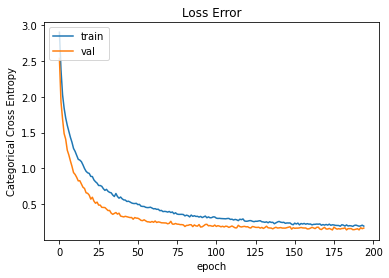

In [ ]:
model_2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

_batch_size = 256
          
print("Ejemplos de entrenamiento: {n_t}".format(n_t = x_train_2.shape[0] ) )

history_2 = model_2.fit(
    x = x_train_2,
    y = y_train_2,
    batch_size = _batch_size,
    epochs=200,
    verbose=2,
    callbacks=[History(), EarlyStopping(patience=10, monitor="val_loss",restore_best_weights=True)],
    validation_data=(x_val_2,y_val_2),
    )

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Loss Error')
plt.ylabel('Categorical Cross Entropy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Predicciones

Las predicciones de cada equipo para el conjunto de test deben ser subidas a la página de la competencia en Kaggle. 

Los modelos propuestos deben ser entrenados únicamente con los datos de entrenamiento indicados y el archivo de predicciones debe poder ser reproducido con el código entregado en el notebook de la tarea.

El puntaje obtenido en esta parte dependerá del ranking obtenido en la competencia (50%) y del score del modelo (50%). Para asignar el puntaje obtenido por score, se comparará el Macro F-score en ambas jerarquías (superclase y subclase) con las predicciones con la misma métrica en una red muy básica.

In [ ]:
Y_pred1 = model.predict(x_test)

In [ ]:
Y_pred1 = np.argmax(Y_pred1, axis=1)

In [ ]:
Y_pred2 = model_2.predict(x_test)

In [ ]:
Y_pred2 = np.argmax(Y_pred2, axis=1)
Y_pred2 = Y_pred2+6

In [ ]:
test_file = open('/content/yoga/yoga_test.txt', 'r')
submission_data = []
cont = 0
for line in test_file:
  img_name, vals = line.split(',')
  submission_data.append((img_name,str(Y_pred1[cont])+' '+str(Y_pred2[cont])))
  cont+=1

In [ ]:
submission = pd.DataFrame(submission_data, columns=['id', 'classes'])

In [ ]:
submission.to_csv('submission.csv', index=False)

### Extras

In [ ]:
#funcion para borrar las imagenes y los directorios creados por data augmentation
def removepath(iter=0):
  for i in range(iter,26):
    directory = str(i)
    parent_dir = "/content"
    path = os.path.join(parent_dir, directory)
    for i in os.listdir(path):
      if '.ipynb' in i:
        continue)
      os.remove(os.path.join(path,i))

    os.rmdir(path)

In [ ]:
#removepath()